# Pandas Built-in Data Visualization

## Introduction to Pandas Visualization

Pandas provides built-in visualization capabilities that are:
- Convenient (directly from DataFrame/Series)
- Quick to implement (minimal code required)
- Good enough for exploratory data analysis
- Built on Matplotlib but with simpler syntax

While not as fully-featured as Seaborn or Matplotlib for complex visualizations, pandas plotting is perfect for quick data exploration.

## Styling Your Plots 

Before we begin plotting, we can apply a global visual style to our plots.  
This improves readability and consistency, especially when generating multiple plots.

Some popular built-in styles include:

- `'ggplot'` — inspired by R's ggplot2
- `'fivethirtyeight'` — used by FiveThirtyEight.com
- `'bmh'` — clean and minimal
- `'dark_background'` — great for dark themes and presentations

We will use the `'ggplot'` style throughout this notebook.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set style for better looking plots
plt.style.use('ggplot')

## Why Use Pandas Built-in Visualization?
- Tight integration with DataFrames - Directly plot from your data structure

- Quick exploratory analysis - Single method calls for basic visualizations

- Simpler syntax - Less code than Matplotlib for common plots

- Good defaults - Reasonable styles and formatting out of the box

**Let's create an interesting dataset to work with:**

In [10]:
# Set random seed for reproducibility
np.random.seed(42)

dates = pd.date_range('2023-01-01', periods=365)

df = pd.DataFrame({
    'Date': dates,
    'Temperature': np.random.normal(25, 5, 365).cumsum(),
    'Humidity': np.random.normal(60, 10, 365),
    'Rainfall': np.random.gamma(2, 2, 365),
    'Wind_Speed': np.random.uniform(0, 20, 365),
    'City': np.random.choice(['New York', 'London', 'Tokyo', 'Sydney'], 365)
})

df['Temperature'] = df['Temperature'] + 10*np.sin(np.linspace(0, 10*np.pi, 365))
df['Humidity'] = df['Humidity'] + 15*np.cos(np.linspace(0, 8*np.pi, 365))
df['Rainfall'] = df['Rainfall'] * (1 + 0.5*np.sin(np.linspace(0, 5*np.pi, 365)))

# Set Date as index
df.set_index('Date', inplace=True)

# Display first 5 rows
df.head()

,Temperature,Humidity,Rainfall,Wind_Speed,City
Date,,,,,
2023-01-01,27.483571,70.987795,3.865005,3.003380,New York
2023-01-02,52.654253,77.205184,1.421610,14.748675,Tokyo
2023-01-03,81.748282,74.983131,7.050578,10.244438,Sydney
2023-01-04,115.206232,75.656114,5.012466,13.604556,London
2023-01-05,139.859205,66.701447,4.385936,0.833458,New York


## Types of Plots Available


### Line Plots (Default)


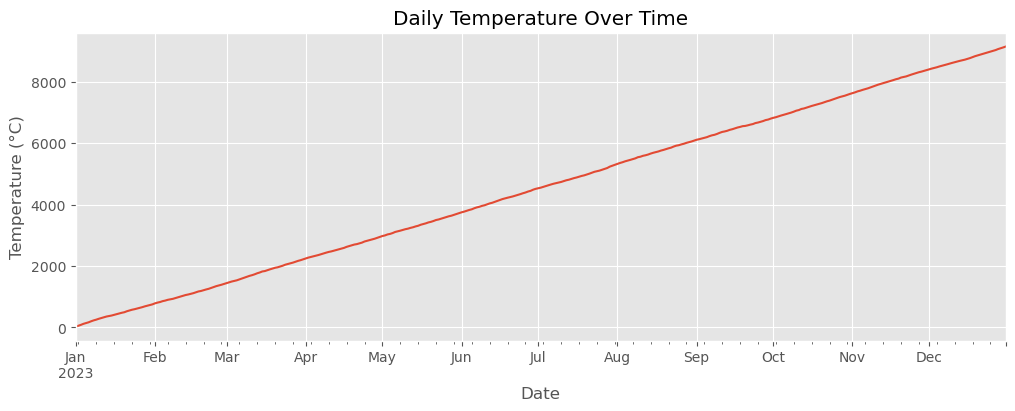

In [13]:
df['Temperature'].plot(figsize=(12, 4), 
                      title='Daily Temperature Over Time',
                      ylabel='Temperature (°C)');

### Bar Plots

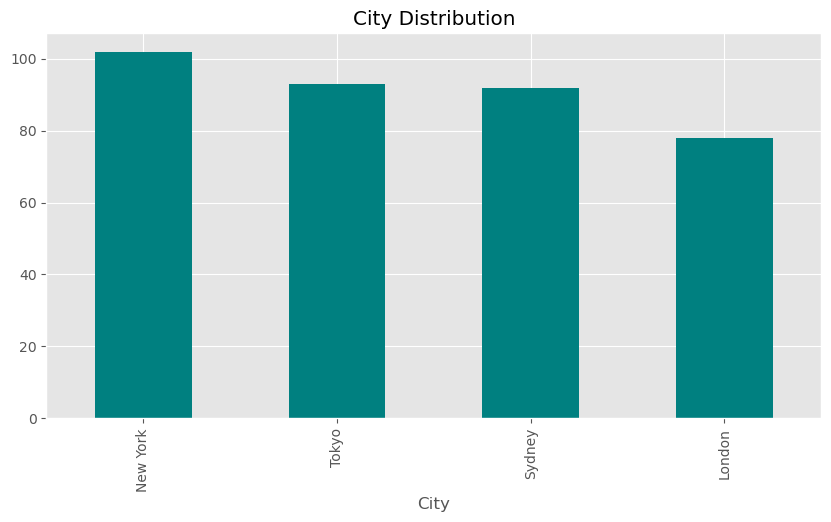

In [12]:
df['City'].value_counts().plot(kind='bar', 
                              figsize=(10, 5),
                              title='City Distribution',
                              color='teal');

### Histograms

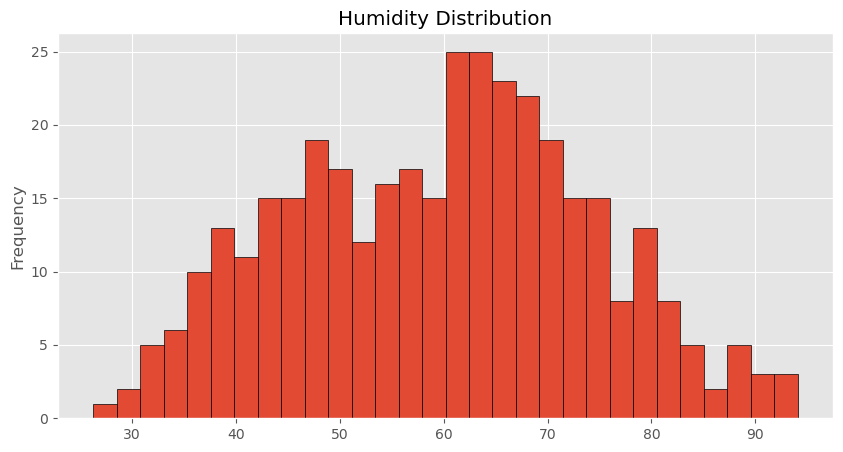

In [14]:
df['Humidity'].plot(kind='hist', 
                   bins=30, 
                   figsize=(10, 5),
                   title='Humidity Distribution',
                   edgecolor='black');

### Box Plots


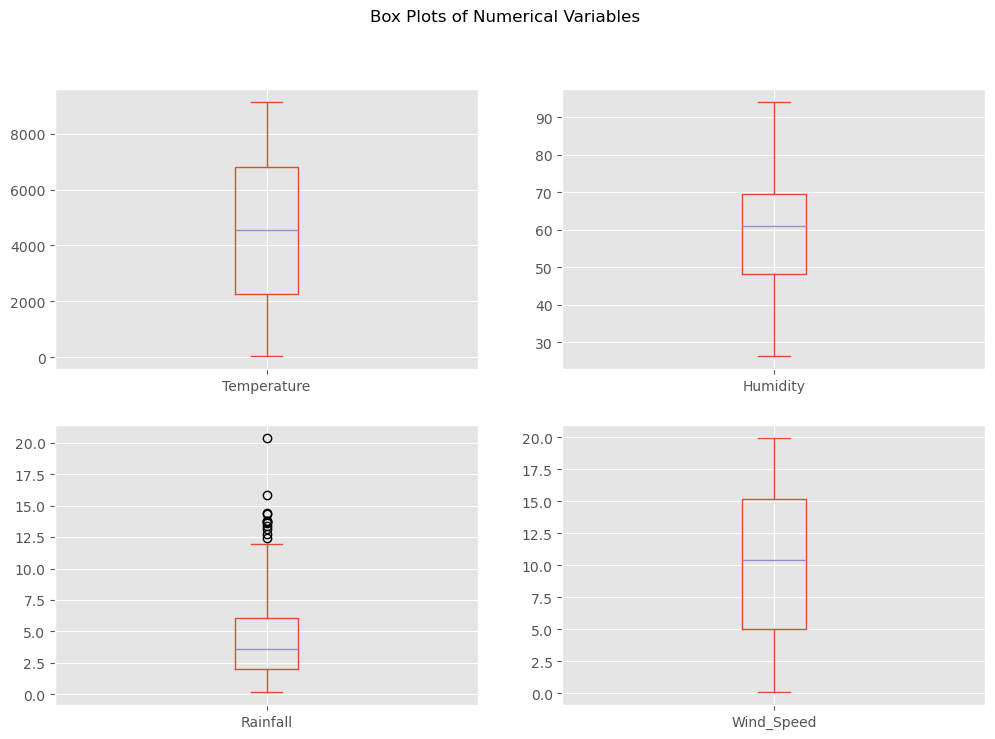

In [15]:
df.plot(kind='box', 
       subplots=True, 
       layout=(2, 2), 
       figsize=(12, 8),
       title='Box Plots of Numerical Variables');

### Area Plots

#### Definitions of Website Traffic Sources

- **Organic Traffic**: Users who find your site through unpaid search engine results (e.g. Google search).
- **Referral Traffic**: Users who come from links on other websites.
- **Direct Traffic**: Users who type your URL directly into the browser or use a bookmark.

These categories help web analysts understand how people are discovering and engaging with a website.



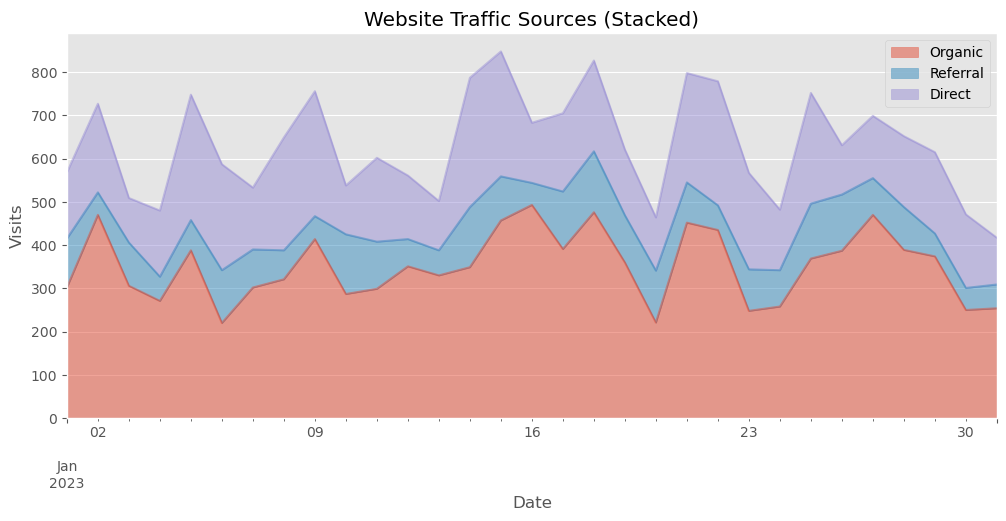

In [28]:
date_range = pd.date_range(start='2023-01-01', end='2023-01-31')

# Simulated website traffic
np.random.seed(42)
traffic_data = pd.DataFrame({
    'Date': date_range,
    'Organic': np.random.randint(200, 500, size=len(date_range)),
    'Referral': np.random.randint(50, 150, size=len(date_range)),
    'Direct': np.random.randint(100, 300, size=len(date_range))
})

traffic_data.set_index('Date', inplace=True)
traffic_data.head()

traffic_data.plot.area(alpha=0.5, figsize=(12, 5), title='Website Traffic Sources (Stacked)', stacked=True)
plt.ylabel("Visits")
plt.show()


### Scatter Plots


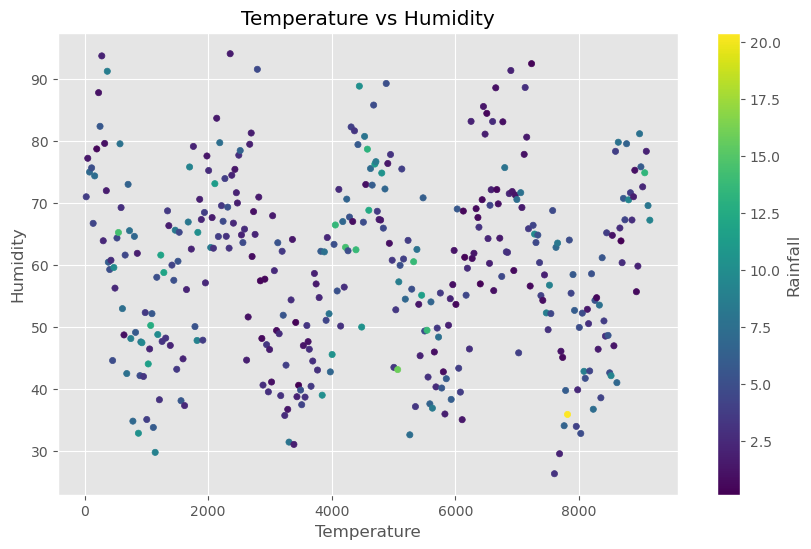

In [17]:
df.plot(kind='scatter', 
       x='Temperature', 
       y='Humidity',
       figsize=(10, 6),
       title='Temperature vs Humidity',
       c='Rainfall', 
       colormap='viridis');

### Pie Charts

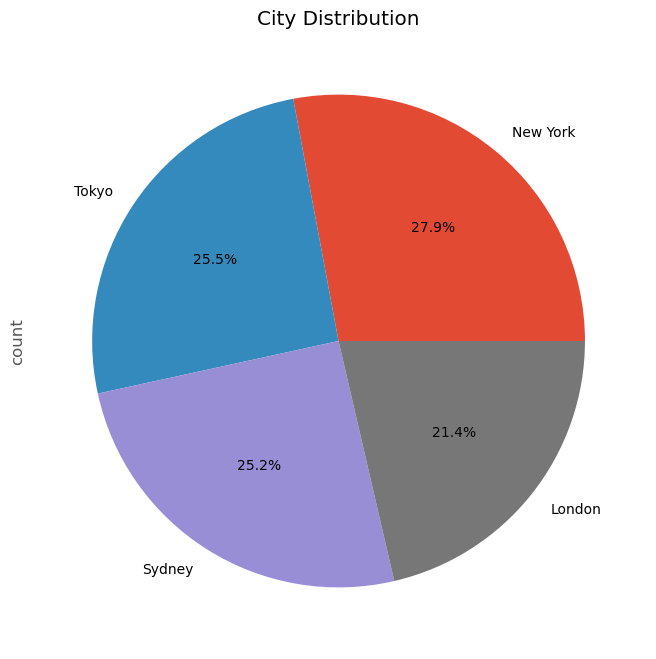

In [19]:
df['City'].value_counts().plot(kind='pie', 
                             figsize=(8, 8),
                             autopct='%1.1f%%',
                             title='City Distribution');

## Customizing Plots
**Pandas plotting accepts many Matplotlib parameters:**

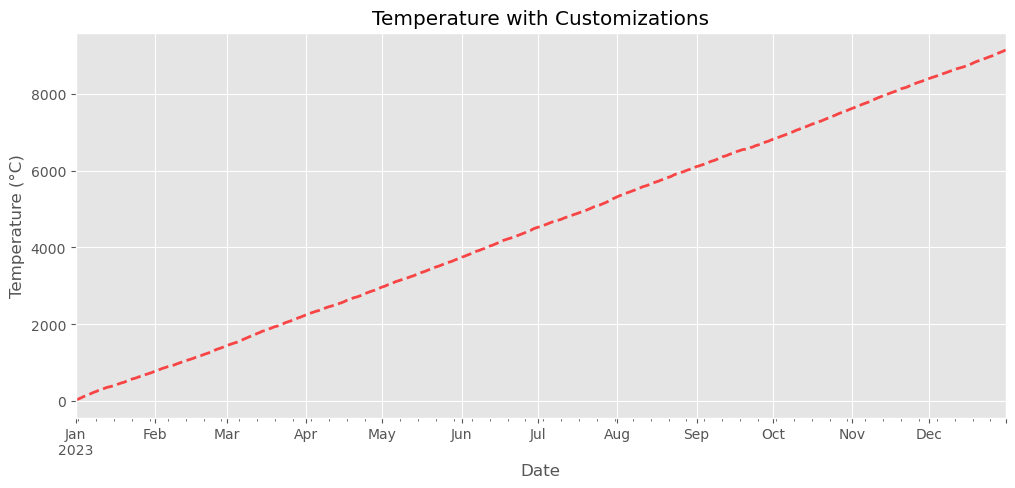

In [20]:
df['Temperature'].plot(figsize=(12, 5),
                     title='Temperature with Customizations',
                     style='--r',          # red dashed line
                     lw=2,                 # line width
                     alpha=0.7,            # transparency
                     grid=True,
                     xlabel='Date',
                     ylabel='Temperature (°C)');

### Multiple Plots in One Figure


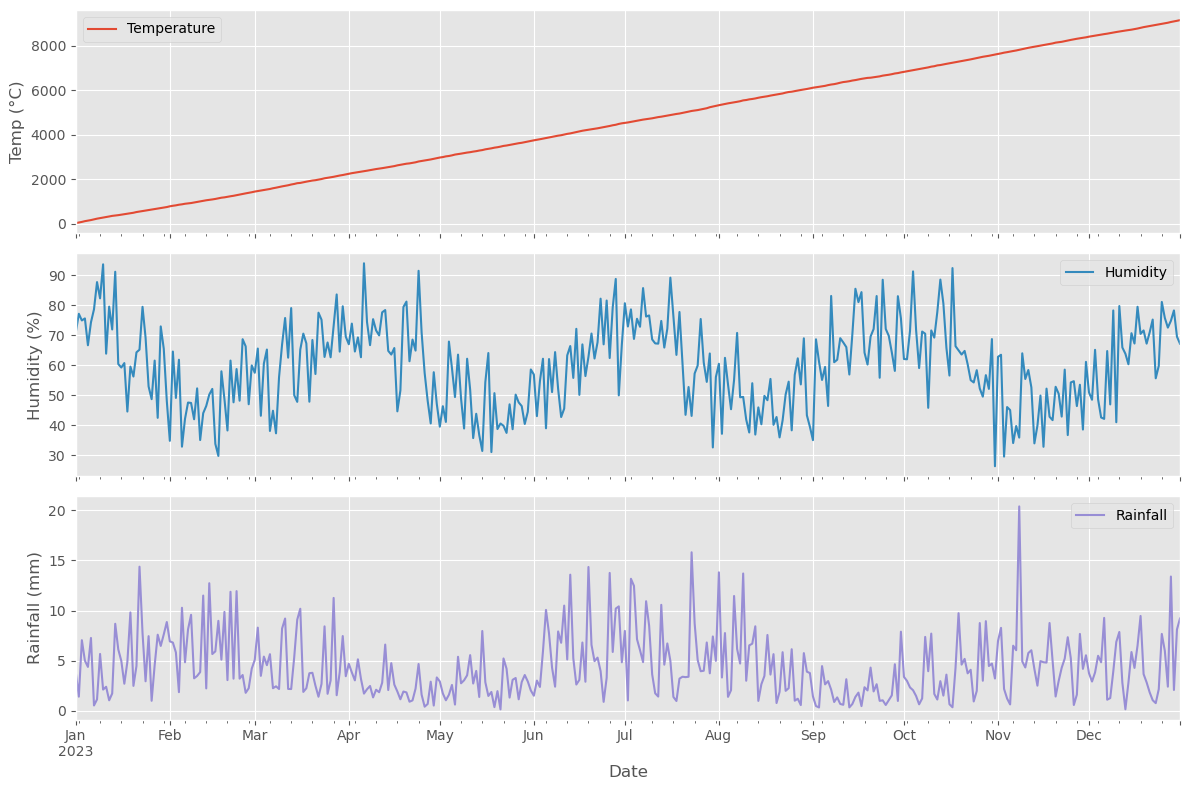

In [25]:
axes = df[['Temperature', 'Humidity', 'Rainfall']].plot(subplots=True,
                                                      figsize=(12, 8),
                                                      layout=(3, 1),
                                                      sharex=True)


# Customize individual subplots
axes[0, 0].set_ylabel('Temp (°C)')
axes[1, 0].set_ylabel('Humidity (%)')
axes[2, 0].set_ylabel('Rainfall (mm)')

plt.tight_layout()

## Hexbin Plot: Visualizing Point Density

A **hexbin plot** is useful when you have a large number of scatter points and want to visualize the **density** of occurrences.  
Instead of showing individual points, it bins them into hexagonal cells and colors them based on how many points fall into each cell.

Great for large datasets where scatter plots become too crowded.


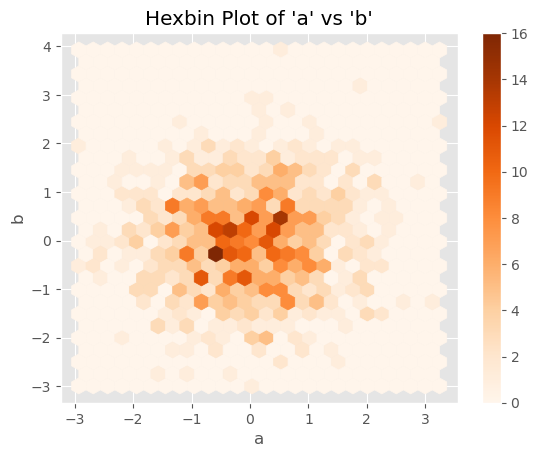

In [33]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])

# Plot using hexbin
df.plot.hexbin(x='a', y='b', gridsize=25, cmap='Oranges')
plt.title("Hexbin Plot of 'a' vs 'b'")
plt.show()

## Conclusion
- Pandas built-in visualization is:

    - Perfect for quick exploratory data analysis

    - Easy to use with DataFrame/Series

    - Customizable enough for most basic needs

    - A great starting point before using more advanced libraries

- For more complex visualizations, consider:

    - Seaborn for statistical visualizations

    - Matplotlib for complete control

    - Plotly for interactive plots